# Generalized Linear Models
 薬品とカブトムシの生存率
原著：Annette J. Dobson and Adrian G. Barnett, An Introduction to Generalized Linear Models, 3rd ed. , CRCPress 2008, p.127  
https://reneues.files.wordpress.com/2010/01/an-introduction-to-generalized-linear-models-second-edition-dobson.pdf


In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
import statsmodels.formula.api as smf

FLAG_fig = False

x:投薬量，n:カブトムシの総数，y:死亡数

In [2]:
df = pd.DataFrame({'x':[1.6907, 1.7242, 1.7552, 1.7842, 1.8113, 1.8369, 1.861, 1.8839],
                   'n':[59, 60, 62, 56, 63, 59, 62, 60],
                   'y':[ 6, 13, 18, 28, 52, 53, 61, 60]})
print(df)

        x   n   y
0  1.6907  59   6
1  1.7242  60  13
2  1.7552  62  18
3  1.7842  56  28
4  1.8113  63  52
5  1.8369  59  53
6  1.8610  62  61
7  1.8839  60  60


生存(n-y)とそうでない（y）という表現の場合，n-yが生存であることを利用して，<br>
glm_model = 'y + I(n-y) ~ x' <br>
という表現を用いる。I()内の'-'は算術減算を表す。I()が無いと，かっこ内の'-’はPatsyの表記と見なされ'-y'はyを除去することとなる。

In [7]:
glm_model = 'y + I(n-y) ~ x'
result = smf.glm(formula=glm_model, data=df, family=sm.families.Binomial(link=sm.families.links.logit())).fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:      ['y', 'I(n - y)']   No. Observations:                    8
Model:                            GLM   Df Residuals:                        6
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18.715
Date:                Mon, 18 Nov 2019   Deviance:                       11.232
Time:                        09:15:28   Pearson chi2:                     10.0
No. Iterations:                     6   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -60.7175      5.181    -11.720      0.000     -70.871     -50.563
x             34.2703      2.912     11.768      0.0

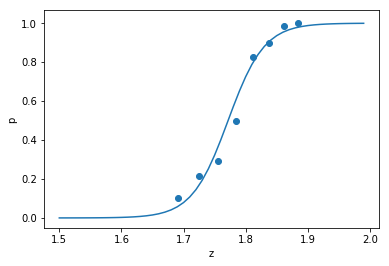

In [6]:
b0 , b1 = result.params
#x = np.arange(df.x.min(), df.x.max(), 0.1)
xx = np.arange(1.5, 2.0, 0.01)
#p = 1.0 /( 1.0 + np.exp( -(b0 + b1*xx ))) 
p = result.predict(exog = pd.DataFrame({'x': xx}))
plt.plot(xx,p)

plt.xlabel('z')
plt.ylabel('p')
plt.scatter(df.x, df.y/df.n)

if FLAG_fig: plt.savefig('fig_GLM_Logistic_Beetle.png')